# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Semana 4**
## **Clases no balanceadas**



# **Parte - 1: El problema de las clases no balanceadas**




El problema de las clases no balanceadas en un problema de clasificación es en general más común de lo que pudiera parecer y por otro lado no es fácil de abordarlo porque precisamente no se tiene la información suficiente de una de las clases. Por ejemplo, si deseamos identificar cuando una tarjeta de crédito es usada de manera indebida, en la práctica no se tienen tantos datos históricos de dichos casos en comparación con la cantidad de registros de usuarios que han hecho un uso adecuado de la misma. Más aún, supongamos que de estos registros históricos se tiene un 98% de casos de uso adecuado de la tarjeta de crédito y solo un 2% de casos de uso inadecuado. Entonces si definimos un modelo que en todo momento diga que el uso de la tarjeta de crédito es adecuado, ya tenemos un modelo con una exactitud del 98%, lo cual podría parecer excelente; pero ¿de qué sirve este modelo de 98% de exactitud, si no sabe detectar ningún caso de uso inadecuado de una tarjeta de crédito?

Así como este, existen muchos temas de interés con clases desbalanceadas, por ejemplo la predicción de defectos en una línea de producción; determinar cuándo un usuario se atrasará en el pago de las mensualidades de su hipoteca; el poder predecir el índice de rotación de personal en una empresa; la detección de correos maliciosos en un servidor; la detección de una enfermedad poco común, o en general la detección de outliers. En fin, esta es solo una pequeña lista de la gran cantidad de casos de problemas llamados no balanceados.

Este tema sigue siendo uno de los de mayor interés en la actualidad dentro de la comunidad científica de aprendizaje automático y en esta semana abordaremos los principales casos para empezar a hacer frente a este tipo de problemas de manera adecuada.

### **Clase mayoritaria y clase minoritaria**

En lo sucesivo y para simplificar el análisis, estaremos suponiendo que estamos en un problema de clasificación con solo dos clases, las cuales están desbalanceadas.

Supondremos que la clase mayoritaria tiene asociada como valor de su clase el 0, el string NO, o el valor booleano FALSE. Así, en general la clase mayoritaria se identificará con la clase negativa.

Por otro lado, supondremos que la clase minoritaria tiene asociada como valor de su clase el 1, el string SI (yes), o el valor booleano TRUE. Así, en general la clase minoritaria se identificará con la clase positiva.





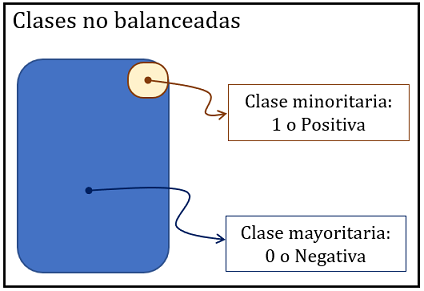

No existe una regla general que nos diga a partir de que proporción podríamos estar hablando de clases desbalanceadas. Inclusive puede depender del tipo de problema, pero para contextualizar con qué tipo de problemas estamos tratando, podríamos decir en principio que a partir de un porcentaje de $80\%$ y $20\%$ ya estamos en un problema de clases desbalanceadas y el cual requeriría un tratamiento especial.

En esta práctica estaremos utilizando ejemplos sintéticos, pero que ilustran de manera clara y sencilla los problemas que se desean abordar. En las próximas semanas estaremos aplicando estas mismas técnicas con datos de problemas reales.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




La siguiente función de scikit-learn nos ayudará a generar un conjunto de datos sintéticos con dos clases y el porcentaje indicado para cada una.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Iniciemos generando un conjunto de 2,000 registros con un 90% de la clase mayoritaria (valor 0) y un 10% de la minoritaria (valor 1).

Como estaremos usando la función "make_calssification" para generar varios tipos de ejemplos y modificando solamente el conjunto de datos y la proporción en cada clase, definiremos una función que nos facilite estas llamadas. Análogamente definimos una función que nos facilite el despliegue de la matriz de confusión.

In [2]:
# Generando los conjuntos desbalanceados:
# n: total de registros a generar
# p0: proporción de registros de la clase mayoritaria (valor 0)
# p1: proporción de registros de la clase minoritaria (valor 1): p1=1-p0
# Obviamente una proporción es complemento del otro, pero especificamos
# ambos para tener presente en todo momento el tipo de desbalanceo que tenemos.

def mis_conjuntos(n, p0, p1):

   X, y = make_classification(
       n_samples=n,             # Se generan "n" registros donde cada factor tiene una distribución gaussiana con varianza 1.
       n_classes=2,             # El conjunto de datos generado constará de dos clases diferentes.
       n_features=2,            # Habrá 2 variables de entrada (factores o variables independientes)
       n_redundant=0,           # No hay factores que sean redundantes, i.e., que uno sea combinación lineal de otros factores.
       n_clusters_per_class=1,  # Cada clase se agrupa alrededor de un único centro.
       weights=[p0, p1],        # [proporción_clase_negativa(0), proporción_clase_positiva(1)]  : p1=1-p0
       flip_y=0.,               # No existen datos mal etiquetados.
       class_sep=0.1,           # Valor que indican la distancia entre clases. Más grande, mayor distancia.
       random_state=0)

   return X,y


# Desplegando la matriz de confusión:
# (etiquetas_reales, etiquetas_de_predicciones)
def mi_cm(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

In [16]:
cm.flatten()

array([543,   0,  57,   0])

Ahora sí, generamos y visualizamos el conjunto de 2000 registros con 2 grupos de clases desbalanceadas del 90% y 10%.

Dimensión de datos generados:
Datos de entrada X: (2000, 2)
Variable de salida y: (2000,)


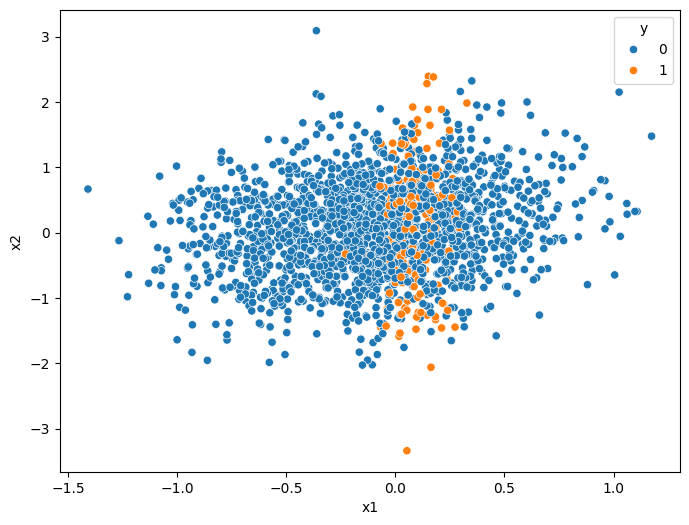

In [3]:
X,y = mis_conjuntos(2000, 0.9, 0.1)

print('Dimensión de datos generados:')
print('Datos de entrada X:', X.shape)
print('Variable de salida y:', y.shape)

# Los transformamos en un DataFrame de Pandas:
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

Usaremos el argumento "stratify=y" para que se haga la partición conservando la proporción de las clases en cada subonjunto.

Ver la documentación respectiva:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
# Realicemos una partición considerando solo al conjunto de etrenamiento (70%) y al de validación (30%).
# Esto ya que para los ejemplos que deseamos ilustrar, no requerimos de un conjunto de prueba.

X,y = mis_conjuntos(2000, 0.9, 0.1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.70, random_state=1, stratify=y)

Generemos nuestro primer modelo y verifiquemos su desempeño con los datos de validación:

In [5]:
# Inicializamos el modelo de regresión logística con los parámetros predeterminados:
modelo = LogisticRegression()

# Entrenamos con los datos de entrenamiento:
modelo.fit(X_train, y_train)

# Realizamos las predicciones con los datos de validación:
yhat = modelo.predict(X_val)

# Veamos el desempeño en cuanto exactitud (accuracy) del modelo:
print('Exactitud del modelo con los datos de prueba: %.1f%%' % (100*modelo.score(X_val,y_val)))

Exactitud del modelo con los datos de prueba: 90.0%


¡Parece ser que obtuvimos un excelente resultado del 90% sin mucho esfuerzo y aún cuando el conjunto está bastante desbalanceado!

Sin embargo, no es así. Para percatarnos de lo que está haciendo el modelo que generamos, veamos su matriz de confusión:



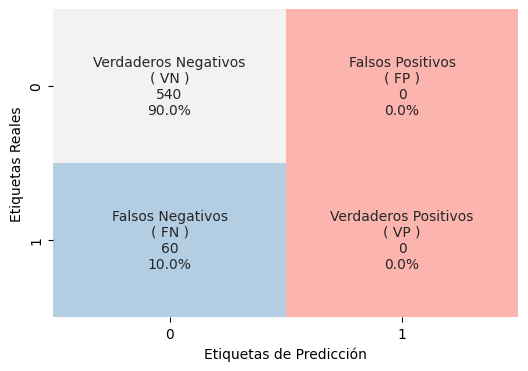

In [6]:
mi_cm(y_val, yhat)

**Oberva que tenemos una columna de ceros (la de predicciones de la clase minoritaria de valor 1), esto implica que nuestro modelo de clasificación no está haciendo nada, simplemente en todo momento hace predicciones siempre para la clase mayoritaria de valor cero y con ello ya garantiza un 90% de buenas predicciones con los datos de la clase mayoritaria y digamos que acepta a cambio tener un 10% de error con las malas predicciones de la clase positiva.**

Recuerda, un renglón o columna completa de ceros en la matriz de confusión en un problema de clasificación bicalse implica un muy mal modelo, indepenientemente del valor que pueda tener la exactitud (accuracy), ya que significa que el entrenamiento se concentró solamente en una de las clases, ignorando la otra.

#### **Modelo Dummy: obtención del punto de partida de las métricas diferentes a la exactitud (accuracy)**

Es usual que en problemas de clasificación desbalanceados se utilice lo que se llama el modelo Dummy en scikit-learn, el cual permite tener un valor base de desempeño mínimo a vencer por los demás modelos, para mostrar que efectivamente están enfrentando de manera adecuada el problema del desbalanceo.

Sabemos que en realidad el modelo Dummy no aprende nada y solamente apuesta por la case mayoritaria. Y para el caso de la exactitud (accuracy) ya sabemos que dicho valor será muy parecido al porcentaje de desbalanceo. En el ejemplo que hicimos previamente resultó exactamente la exactitud igual a 90%, ya que utilizamos el argumento "stratify=y"; pero si no se utiliza este argumento, dicho resultado puede variar un poco debido a la aleatoriedad de dicha partición. Por otro lado, estrictamente no deberíamos utilizar este argumento "stratify" al momento de realizar la partición, ya que esto significa filtrado de información (data leakage), pero usualmente se utiliza bajo la hipótesis de que tu conjunto de entrenamiento tendrá una distribución de sus clases igual a la de los datos reales. En resumen, lo importante es que sabemos que si queremos mejorar este modelo con base a la exactitud, ya sabemos que el porcentaje a vencer es de aproximadamente el 90% en este ejemplo.

Sin embargo, cuando utilizamos otras métricas diferentes a la exactitud como medida de desempeño, no está claro cuál debiera ser ese umbral mínimo que desamos superar. Es aquí donde entra este clasificador Dummy, para que nos diga, aparte de la exactitud, cuales son esos valores mínimos a vencer.

Veamos primero los casos de la exactitud con diferentes estrategias de decisión.



In [7]:
from sklearn.dummy import DummyClassifier     # importamos el clasificador

In [24]:
print("Metricas de Desempeño:")
print(f"Accuracy: {round(accuracy_score(y_val, yhat), 3)}")
print(f"Precision: {round(precision_score(y_val, yhat),3) }")
print(f"Recall: {round(recall_score(y_val, yhat), 3)}")
print(f"F1 Score: {round(f1_score(y_val, yhat), 3)}")
print(f"ROC AUC Score: {round(roc_auc_score(y_val, yhat), 3)}")

Metricas de Desempeño:
Accuracy: 0.905
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión del conjunto de validación del modelo Dummy
con la estrategia de mayor frecuencia:


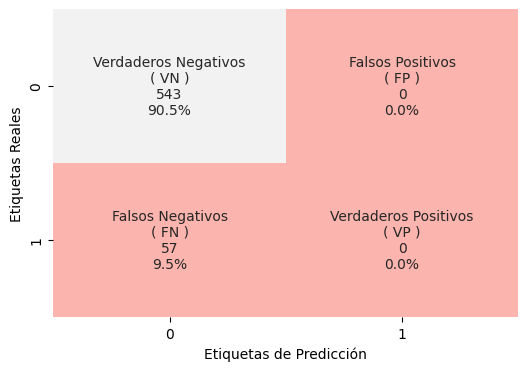

None

Proporción en clase negativa del conjunto de validación:  0.905

Proporción en clase negativa del conjunto de entrenamiento:  0.8978571428571429


In [23]:
X,y = mis_conjuntos(2000, 0.9, 0.1)    # generamos de nuevo las dos clases con desbalanceo 90% y 10%

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.70, random_state=3)   # realizamos la partición.

modeloDummy = DummyClassifier(strategy='most_frequent')    # Inicializamos el modelo Dummy con el crierio de
                                                           # predecir siempre con el valor de la clase de mayor frecuencia.

modeloDummy.fit(X_train, y_train)       # entrenamos con los conjuntos de entrenamiento

yhat = modeloDummy.predict(X_val)       # realizamos las predicciones con el conjunto de validación, el cual sabemos
                                        # que siempre será igual a cero, ya que representa a la case mayoritaria.


# Obtenemos los valores de la matriz de confusión del modelo Dummy:
print('Matriz de confusión del conjunto de validación del modelo Dummy\ncon la estrategia de mayor frecuencia:')
# Observa que no necesariamente debe ser exactamente igual a 0.90 el valor de los VN,
# por lo que comentamos de la aleatoriedad de la partición; pero se espera en dado caso un valor muy cercano:
print(mi_cm(y_val, yhat))

print('\nProporción en clase negativa del conjunto de validación: ', 1 - y_val.sum() / y_val.shape[0])

# De nuevo, para este ejemplo se espera un valor cercano o igual al 90% en el siguiente resultado:
print('\nProporción en clase negativa del conjunto de entrenamiento: ', (1-y_train.sum() / y_train.shape[0]))


Y obtenemos el resultado que ya se esperaba y que hemos estado comentando: **que si el modelo se decide siempre por la clase mayoritaria, el valor de la métrica de la exactitud (accuracy) será precisamente la proporción de la clase mayoritaria del conjunto que se esté utilizando**. En este caso, la exactitud en el conjunto de validación es de $90.5\% + 0\% = 90.5\%$, muy cercano a la partición del conjunto de entrenamiento e igual a la partición del conjunto de validación.

Igualmente observamos la columna de ceros, resultado que también ya se esparaba para el caso de siempre hacer la predicción sobre la clase de mayor frecuencia.

**Es decir, este ejemplo nos muestra que cuando obtienes una columna de ceros o muy cercana a ceros en la matriz de confusión de las etiquetas de las predicciones, debes preguntarte si el modelo realmente está aprendiendo algo o si simplemente está decidiendo siempre por la clase de mayor frecuencia.**

NOTA: Puedes a manera de ejemplo cambiar el valor de la semilla "random_state" en "train_test_split" y seguirás obteniendo valores iguales o muy cercanos de la exactitud a 0.90, tanto en el conjunto de entrenamiento como en el de validación.

Se puede aplicar una estrategia algo menos simple en el modelo Dummy, donde ahora se hacen predicciones aleatorias de acuerdo al porcentaje de distribución de las clases detectadas en el conjunto de entrenamiento. Dicho modelo Dummy, sigue siendo simple, pero nos podrá dar valores no cero en la columna de etiquetas de las predicciones que nos lleven a tener un punto de partida (baseline) más interesante para determinar si el modelo está aprendiendo a clasificar datos de la clase minoritaria.

Veamos qué resulta con los mismos datos anteriores pero ahora usando la estrategia "stratified" y la misma métrica de exactitud (accuracy).





In [26]:
print("Metricas de Desempeño:")
print(f"Accuracy: {round(accuracy_score(y_val, yhat), 3)}")
print(f"Precision: {round(precision_score(y_val, yhat),3) }")
print(f"Recall: {round(recall_score(y_val, yhat), 3)}")
print(f"F1 Score: {round(f1_score(y_val, yhat), 3)}")
print(f"ROC AUC Score: {round(roc_auc_score(y_val, yhat), 3)}")

Metricas de Desempeño:
Accuracy: 0.828
Precision: 0.162
Recall: 0.193
F1 Score: 0.176
ROC AUC Score: 0.544


Matriz de confusión en el conjunto de Validación.
Modelo Dummy con la estrategia "stratified":


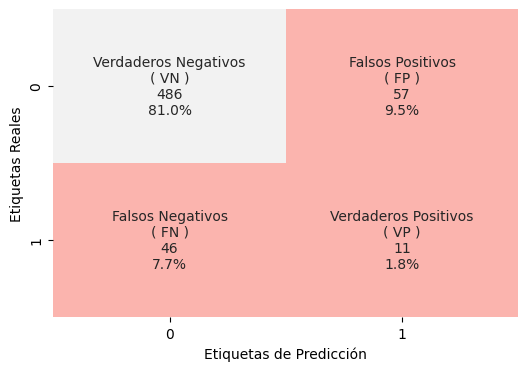

None

Proporción del conjunto de validación:  0.905

Proporción del conjunto de entrenamiento:  0.8978571428571429


In [25]:
modeloDummy = DummyClassifier(strategy='stratified', random_state=7)   # ahora hacemos predicciones aleatorias de la misma
                                                                       # manera en que están estratificadas las clases.

modeloDummy.fit(X_train, y_train, sample_weight=None)
yhat = modeloDummy.predict(X_val)

print('Matriz de confusión en el conjunto de Validación.')
print('Modelo Dummy con la estrategia "stratified":')
print(mi_cm(y_val, yhat))

print('\nProporción del conjunto de validación: ', 1 - y_val.sum() / y_val.shape[0])
print('\nProporción del conjunto de entrenamiento: ', (1-y_train.sum() / y_train.shape[0]))


Vemos que disminuye el valor de la exactitud en el conjunto de validación a $81.0\% + 1.8\% = 82.8\%$ con la estrategia "stratified"; pero como ahora se están haciendo predicciones aleatorias con la proporción de las clases, se espera tener al menos algunas buenas predicciones en la clase minoritaria por simple azar, a costa de que disminuyan las predicciones de la clase mayoritaria. Repetimos, no importa si el valor de la exactitud disminuye, si esto implica tener predicciones en los VP diferentes de cero.

Veamos analíticamente cómo podemos obtener el valor $82.0\%$ para los datos de este ejemplo.

De la matriz de confusión anterior vemos que hay $(486+57)=543$ datos en el conjunto de validación de la clase mayoritaria (datos reales de valor 1), por lo que esta estrategia con la proporción del conjunto de entrenamiento de $0.897857$ debiera arrojar aproximadamente unos $543\times 0.897857 \approx 488$ verdaderos negativos. Que es aproximadamente lo observado en la matriz de confusión (recuerda que no necesariamente deben ser exactamente iguales, debido a la aleatoriedad del proceso) donde se obtuvo $VN=486$.

Por su parte, en la clase minoritaria tenemos $(46+11)=57$ datos en el conjunto de validación (datos reales de valor 0), por lo que en teoría haciendo predicciones al azar con la proporción que tenemos en el conjunto de entrenamiento, deberíamos obtener aproximadamente $57\times (1-0.897857)\approx 6$ verdaderos positivos. Y en este ejemplo se obtuvo VP=11.

Es decir, si decidimos ahora con base a la proporción de las clases del conjunto de entrenamiento (de hecho, durante el entrenamiento el modelo lo único que "aprende" es a obtener la proporción de la clase mayoritaria), tendríamos que para esta partición particular de los datos, que el valor de la exactitud en el conjunto de validación debiera ser, **en teoría**, de $(488 + 6)/ 600 = 0.82333$, es decir, aproximadamente de un $82.33\%$, el cual es muy cercano al valor de $82.8\%$ obtenido con los datos de validación y el modelo Dummy generado en el ejemplo con la estrategia "stratified".  

En resumen, si usamos ahora la estrategia "stratified" de decidir con base a la proporción de clases en el conjunto de entrenamiento, sabremos que el modelo estará aprendiendo de los datos cuando ahora la exactitud en el conjunto de validación de este ejemplo sea mayor a la exactitud obtenida en su matriz de confusión, que fue de $82.8\%$.

Más adelante también usaremos la estrategia "uniform" en la cual de manera uniforme hace predicciones aleatorias de cada clase, que en el caso binario significa que simplemente estará haciendo predicciones al azar el 50% de las veces para la clase mayoritaria y el 50% de las veces para la clase minoritaria

Revisa las diferentes estrategias del clasificador Dummy en su documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

### **Ponderando diferente a cada clase**

Veamos ahora algunas técnicas más inteligentes para hacer predicciones correctas de la clase minoritaria que no se basen simplemente en el azar.

Una manera de compensar este desbalanceo de las clases es asignando pesos diferentes a cada clase, de manera que durante el proceso de optimización de la función de costo se castigue mayormente al modelo cuando se equivoca con la clase minoritaria. **Como se tienen menos datos en la clase minoritaria se castiga mayormente a dicha clase para forzar a que los pocos datos que se tengan sean bien clasificados, aún cuando esto implique el aumento de datos mal clasificados en la clase mayoritaria**.

Una regla empírica es asignar estos pesos invertidos en relación a los pesos de cada clase. Esta regla empírica de balanceo en ocasiones puede ayudar cuando las clases no están demasiado desbalanceadas.

En particular la función de regresión logística de scikit-learn proporciona un argumento llamado "class_weight" para ajustar dicho desbalanceo. Si las clases no están desbalanceadas, se considera el valor de uno a cada clase.

La asignación de dichos pesos se hace mediante el formato de diccionario, indicando el peso asignado a cada clase: $\{0:\omega_0, 1: \omega_1\}$.

A manera de ejemplo, asignemos estos pesos con base a la regla empírica de asignar los pesos en orden intercambiado, que en nuestro ejemplo, como la clase negativa y positiva están en proporción 90% y 10%, respectivamente, los pesos serían ahora 0.1 y 0.9, para las clases 0 y 1, respectivamente. Veamos los resultados obtenido con dicho ajuste:

Exactitud con datos de Validación: 60.3%


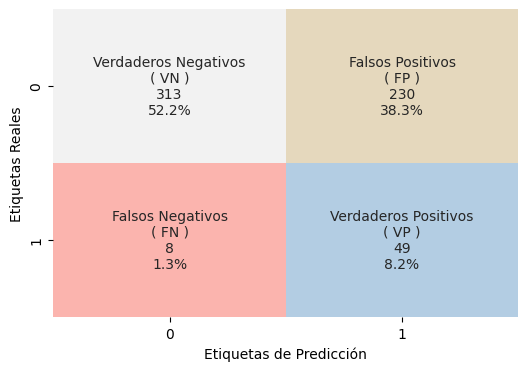

In [10]:
modelo = LogisticRegression(class_weight={0:0.1, 1:0.9})   # A la clase positiva minoritaria (1) la castigamos más
                                                           # para provocar que no se equivoque tanto.

# Entrenamos el modelo con los datos de entrenamiento:
modelo.fit(X_train, y_train)

# Obtenemos las predicciones con el conjunto de validación:
yhat = modelo.predict(X_val)

# Obtenemos el desempeño con el valor de la exactitud (accuracy):
print('Exactitud con datos de Validación: %.1f%%' % (100*modelo.score(X_val,y_val)))
mi_cm(y_val, yhat)

Efectivamente, sí ayuda, ahora el modelo tiene un $8.2\%$ de verdaderos positivos (VP) cuando antes era de cero o cercano a cero este valor, aunque los verdaderos negativos (VN) disminuyeron hasta un $52.2\%$. Además, la exactitud del modelo en el conjunto de validación también disminuyó al $60.3\%$. En este ejemplo, como las clases están bastante desbalanceadas esta regla empírica ya no es del todo válida y afectó demasiado a la clase mayoritaria, pero lo que queremos decir con este ejemplo es que sí ayuda a aumentar los VP usando el criterio de asignación de pesos durante el proceso de entrenamiento, aunque habrá que cuidar también que no afecte demasiado a los VN. Veremos más adelante otras técnicas que ayudarán a equilibrar mejor estos porcentajes.


Si revisas la documentación de la función LogisticRegresion de scikit-learn, observarás que también se puede asignar la opción 'balanced' en el argumento "class_weight". No es estrictamente el orden invertido de los pesos que acabamos de aplicar, pero puedes aplicarlo y observar que da resultados muy parecidos en la matriz de confusión. De hecho, en el caso binario, si usamos la fórmula que se indica en la documentación de scikit-learn para calcular los pesos de cada clase de acuerdo el argumento 'balanced', sería $\frac{N}{2 * m}$, donde $N$ es el tamaño de la muestra y $m$ la cantidad de datos en la respectiva clase.

Consulta la documentación de la función LogisticRegresión para que obtengas mayor información al respecto:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html






### **Valorando la importancia de los Falsos Positivos y Falsos Negativos**

Así, debemos analizar, ponderar y valorar cuánto nos cuesta cada uno de los errores que podemos cometer: los Falsos Positivos (FP) y Falsos Negativos (FN).

Sobra decir que no hay una decisión universal para decidir cuál de estos errores es más costoso, o inclusive para determinar un umbral a partir del cual podamos decir que los FN y FP ya son bastante pequeños, o para decir cuándo los valores de VP y VN ya son adecuados. Estas decisiones se deberán de tomar en conjunto con los equipos, departamentos y tomadores de decisiones respectivos en cada empresa.

Veamos por último algunas variantes en los pesos asignados a cada clase a través del argumento "class_weight" y observar cómo varía el desempeño del modelo.

In [11]:
delta = np.linspace(.05, .4, 8)   # generamos 8 valores entre 0.05 y 0.4 para generar los diferentes pesos de las clases.
tabla = list()

for w in delta:
  modelo = LogisticRegression(class_weight={0:w, 1:(1-w)})
  modelo.fit(X_train, y_train)
  yhat = modelo.predict(X_val)

  acc = 100*modelo.score(X_val,y_val)

  cm = confusion_matrix(y_val, yhat)

  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot

  tabla.append([w, 1-w, acc, vn, fp, fn, vp])

print(tabulate(tabla,
               headers=["peso_clase_0","peso_clase_1", "Exactitud(%)", "VN(%)", "FP(%)", "FN(%)", "VP(%)"],
               tablefmt="github",
               floatfmt=".2f",
               colalign=("center","center","center",)))

|  peso_clase_0  |  peso_clase_1  |  Exactitud(%)  |   VN(%) |   FP(%) |   FN(%) |   VP(%) |
|----------------|----------------|----------------|---------|---------|---------|---------|
|      0.05      |      0.95      |     36.50      |   27.00 |   63.50 |    0.00 |    9.50 |
|      0.10      |      0.90      |     60.33      |   52.17 |   38.33 |    1.33 |    8.17 |
|      0.15      |      0.85      |     71.67      |   70.67 |   19.83 |    8.50 |    1.00 |
|      0.20      |      0.80      |     82.83      |   82.83 |    7.67 |    9.50 |    0.00 |
|      0.25      |      0.75      |     87.83      |   87.83 |    2.67 |    9.50 |    0.00 |
|      0.30      |      0.70      |     89.67      |   89.67 |    0.83 |    9.50 |    0.00 |
|      0.35      |      0.65      |     90.33      |   90.33 |    0.17 |    9.50 |    0.00 |
|      0.40      |      0.60      |     90.50      |   90.50 |    0.00 |    9.50 |    0.00 |


Podemos hacer los siguientes comentarios con relación a dicha tabla:

*   Una vez asignado un peso mayor o igial al 0.20 a la clase mayoritaria, el modelo ya no se preocupa por los VP de la clase minoritaria.
*   A medida que aumenta el porcentaje de VN, disminuye el de VP.
*   A medida que disminuye el porcentaje de FP, aumenta el de FN.
*   El mejor valor alcanzado para VP con los pesos asignados es cercano al 10%, muy por debajo aún como para poder decir que el modelo realiza predicciones aceptables en la clase positiva. Y más aún, en este mismo caso el porcentaje de las predicciones correctas de la clase negativa baja al 27%.







**En resumen, la asignación de pesos a cada clase durante el proceso de optimización ayuda, pero no es suficiente cuando las clase están demasiado desbalanceadas.**

**Es por ello que cuando tenemos clases desbalanceadas, la métrica exactitud (accuracy) ya no es adecuada y debemos recurrir a otras métricas que den mayor importancia a los datos de la clase minoritaria.**

En particular la precisión (precision), sensibilidad (recall) y el f1_score nos ayudarán a ello.

# **Parte - 2: Más métricas para medir el desempeño:**
## **$precision$, $recall$, $f1{\text -}score$, $G{\text -}mean$**


En clases desbalanceadas, la exactitud da una mayor importancia a la clase mayoritaria y por ello el valor de desempeño del modelo es en general demasiado optimista.

Por ello definamos las siguientes métricas.

$precision = \frac{VP}{VP + FP}$

$exhaustividad(recall) = \frac{VP}{VP + FN}$

$especificidad = \frac{VN}{VN + FP}$

La $precision$ también es llamada tasa de predicciones positivas y se refiere a la veracidad de la afirmación cuando el modelo predice un dato como la clase positiva. Es decir, cuando nuestro modelo hace una predicción de un registro como de la clase positiva (clase minoritaria), qué porcentaje de veracidad hay en dicha afirmación.

El complemento $1-precision$ se conoce como tasa de falsas alarmas.

Por otro lado, la $exhaustividad$ nos habla de la tasa de predicciones correctas en el conjunto de los registros de la clase positiva. Es decir, si consideramos solamente los registros de la clase positiva (clase minoritaria), qué porcentaje de estos los predice correctamente nuestro modelo. Observa que en este caso no intervienen datos de la clase mayoritaria y por ello permite evaluar mejor el desempeño del modelo en la clase minoritaria.

La $exhaustividad$ también se conoce como $sensibilidad$ y su nombre en inglés es $recall$. En general estaremos usando el nombre de exhaustividad o inclusive recall, como su nombre en inglés ya que es usual hacerlo también así en literatura de idioma español.

La $especificidad$ por su parte considera solamente los datos de la clase negativa real y obtiene la proporción de veraderos negativos. Es decir, si consideramos solamente los datos de la clase negativa, es la proporción de las predicciones correctas.

Finalmente se definen dos métricas más como promedios de varias de estas que acabamos de definir: $f1{\text -}score$ y $G{\text -}mean$.

La métrica $f1{\text -}score$ se define como la media armónica de la $precision$ y $exhaustividad (recall)$. La media armónica entre dos números es un promedio que le resta importancia nuevamente al número mayor, pero cuando ambos números son iguales, coincide con el promedio aritmético estándar. La fórmula de dicha métrica se puede expresar como sigue:

$f1{\text-}score = \frac{2 VP}{2VP + FP + FN}$.

A $f1{\text -}score$ también se le suele llamar $F{\text -}score$.

La métrica $G{\text -}mean$ se define como la media geométrica entre el $recall$ (buen desempeño de la clase positiva) y la $especificidad$ (buen desempeño de la clase negativa). Su fórmula esta dada como sigue:

$G{\text-}mean = \sqrt{recall \times especificidad}$

A través del promedio geométrico de la especificidad y el recall la $G{\text -}mean$ evita el sobreentrenamiento de la clase negativa y el subentrenamiento de la clase positiva. Es por ello que es muy adecuada para el caso de clases desbalanceadas, en lugar de la exactitud (accuracy). Este promedio geométrico valora más la magnitud de la clase minoritaria, pero se afecta menos que el promedio armónico de la $f1{\text -}score$, y de nuevo, por ello se recurre a ella en problemas no balanceados.

Cuando ambas clases están balanceadas, la media geométrica, la armónica y la aritmética coinciden. De hecho, en general: $media_{armónica} \le media_{geométrica} \le media_{aritmética}$.

En la siguiente tabla se resumen dichas fórmulas.







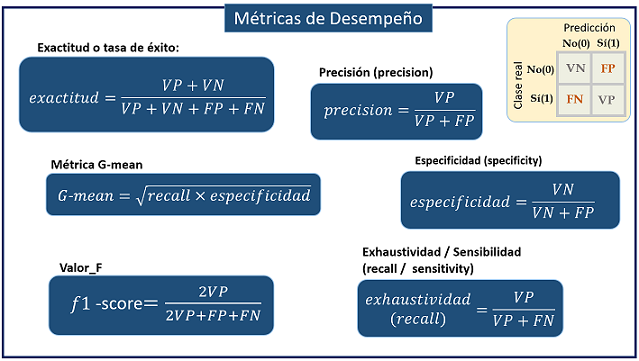

Dentro del área de aprendizaje automático todas estas métricas toman sus valores en el intervalo $[0,1]$.

#### **Tiempo de estudio:**

*   Para saber más sobre las métricas $precision$ y $exhaustividad$ (recall), debes consultar el capítulo 3, "Classification", sección "Performance Measures" y subsecciones "Precision and Recall" y "Precision/Recall trade-off" del libro de Aurélien Géron.

*   Igualmente lee la sección "IV.EVALUATION METRICS" del artículo siguiente para complementar el tema de estas métricas: T. M. Alam et al., "An Investigation of Credit Card Default Prediction in the Imbalanced Datasets," in IEEE Access, vol. 8, pp. 201173-201198, 2020, doi: 10.1109/ACCESS.2020.3033784.

*   Asimismo te puede apoyar la revisión de la presentación del archivo "MMNA_IAyAA_semana_3_Matriz_de_Confusion_teoria.pdf" que se encuentra en Canvas.

Realicemos de nuevo el entrenamiento de un nuevo conjunto desbalanceado incluyendo estas nuevas métricas. Y como comentamos previamente estaremos usando el nombre de $recall$, en inglés para referirnos a la $exhaustividad$.

In [ ]:
# En el siguiente ejemplo generaremos ahora un conjunto con 80% y 20% de desbalanceo:

X,y = mis_conjuntos(2000, 0.8, 0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.70, random_state=3)

delta = np.linspace(.05, .3, 6)
tabla = list()

for w in delta:
  modelo = LogisticRegression(class_weight={0:w, 1:(1-w)}, C=100)
  modelo.fit(X_train, y_train)
  yhat = modelo.predict(X_val)

  acc = 100*modelo.score(X_val,y_val)

  cm = confusion_matrix(y_val, yhat)

  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot

  precision = vp / ( vp+fp)
  recall = vp / (vp+fn)
  f1score = 2*vp / (2*vp+fp+fn)
  especificidad = vn / (vn+fp)
  gmean = np.sqrt(recall * especificidad)

  tabla.append([w, (1-w), acc, vn, fp, fn, vp, precision, recall, f1score, gmean])

print(tabulate(tabla,
         headers=["w (clase 0)","(1-w) (clase 1)","Exact(%)", "VN(%)", "FP(%)", "FN(%)", "VP(%)", "precision", "recall", "f1score", "gmean"],
         tablefmt="github",
         floatfmt=".2f"
         ))

|   w (clase 0) |   (1-w) (clase 1) |   Exact(%) |   VN(%) |   FP(%) |   FN(%) |   VP(%) |   precision |   recall |   f1score |   gmean |
|---------------|-------------------|------------|---------|---------|---------|---------|-------------|----------|-----------|---------|
|          0.05 |              0.95 |      44.00 |   24.50 |   56.00 |    0.00 |   19.50 |        0.26 |     1.00 |      0.41 |    0.55 |
|          0.10 |              0.90 |      50.17 |   30.67 |   49.83 |    0.00 |   19.50 |        0.28 |     1.00 |      0.44 |    0.62 |
|          0.15 |              0.85 |      56.17 |   36.67 |   43.83 |    0.00 |   19.50 |        0.31 |     1.00 |      0.47 |    0.67 |
|          0.20 |              0.80 |      64.00 |   47.00 |   33.50 |    2.50 |   17.00 |        0.34 |     0.87 |      0.49 |    0.71 |
|          0.25 |              0.75 |      63.17 |   54.83 |   25.67 |   11.17 |    8.33 |        0.25 |     0.43 |      0.31 |    0.54 |
|          0.30 |              0.7

Observamos que con los pesos de w=0.2  y (1-w)=0.8 en las clases negativa y positiva, respectivamente, se obtiene un valor $recall$ relativamente aceptable de 0.87, aunque no así en la $precision$, que es de 0.34. Es aquí donde habrá que empezar a buscar el mejor balance entre estas métricas de acuerdo a los objetivos e intereses de cada organización.

De manera general sabemos que la métrica $f1{\text -}score$ pondera de manera igualmente importante a las dos clases de un problema binario, por ello tendrá un mal desempeño cuando una de sus clases lo tiene. En cambio, la métrica $G{\text -}mean$ también da mayor importancia a la clase minoritaria, pero no castiga tanto el promedio como $f1{\text -}score$, como se puede ver en los resultados de las dos últimas columnas, donde la métrica $G{\text -}mean$ no se disminuye tanto como sucede con $f1{\text -}score$.

En la tabla anterior, para desplegar los valores de las métricas de $precision$, $recall$, $f1{\text -}score$ y $G{\text -}mean$ aplicamos simplemente las fórmulas respectivas dadas previamente, pero igualmente se puede hacer uso de librerías como scikit-learn. En particular puedes consultar la documentación siguiente:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

La métrica $G{\text -}mean$ se encuentra en el paquete "imbalanced-learn":

http://glemaitre.github.io/imbalanced-learn/generated/imblearn.metrics.geometric_mean_score.html

En los ejercicios de las próximas semanas estaremos usando las funciones dadas por estas librerías ya que facilitan su uso, sobre todo cuando se combinan con Pipelines.

Así, para problemas de clasificación donde las clases estén muy desbalanceadas, el entrenamiento y búsqueda de los pesos de cualquier modelo de aprendizaje automático en general, llevará a resultados bastante limitados al aplicar los métodos de optimización. Ya tenemos métricas que nos ayudan a darnos cuenta de cómo está el desempeño en la clase minoritaria, pero ello no implica que durante el entrenamiento podamos llegar a resultados con desempeños altos.

Por ello, estudiaremos a continuación varias técnicas de balanceo que ayudarán a enfrentar de mejor manera el problema del desbalanceo de clases, para que durante el proceso de entrenamiento podamos llegar a obtener mejores desempeños en la clase minoritaria, midiéndolos con alguna de las nuevas métricas que hemos definido previamente.

Puedes complementar el estudio de las métricas en la presentación **MNA_IAyAA_semana_3_Matriz_de_Confusion_teoria.pdf** que está en Canvas.

### **Fin de esta ejemplo de la semana 4**